In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Problem 1

In [2]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


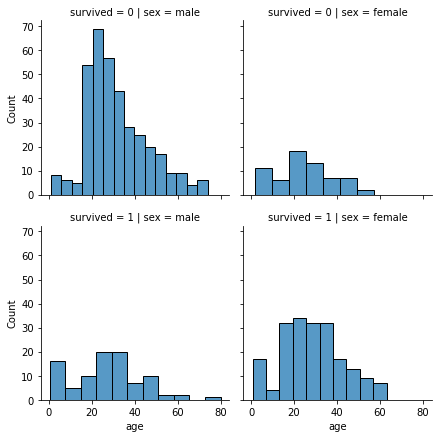

In [3]:
g = sns.FacetGrid(titanic, col="sex",  row="survived")
g.map_dataframe(sns.histplot, x="age")
g.set_axis_labels("age", "Count")

Observations:
1. Number of male passengers are more than female passengers. (Male: 577, Female: 314)
2. Death count is higher in male passengers compare to female passengers.
3. Survival ratio is higher in female passengers compare to male passengers.
4. From total male passenger’s death, most of are having age between 20 to 40. Same thing we can observe for the female passengers too.
5. Only 2 males and 3 females are survived whose age are above 60.
6. Same number of male and female children survived whose age are below 10 years.
7. Regards to aged people whose age is higher than 60, Survival ratio is higher in female passengers compare to male passengers.
8. All the female who are above 60, survived.

# Problem 2

In [4]:
from sklearn.impute import SimpleImputer
import statistics

In [5]:
mpg_file = "auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
mpg_df = pd.read_csv(mpg_file, delim_whitespace=True, names=column_names)
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [6]:
horsepower_missing_index = mpg_df[mpg_df.horsepower=='?'].index
mpg_df.loc[horsepower_missing_index]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [7]:
mpg_df.loc[horsepower_missing_index, 'horsepower'] = np.nan
mpg_df.loc[mpg_df.horsepower.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [8]:
# Change horsepower datatype from object to float
mpg_df.horsepower = mpg_df.horsepower.apply(pd.to_numeric)
mpg_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [9]:
# summary statistic for the each numerical column
print(mpg_df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']].mean())
print('\n')
print(mpg_df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']].median())
print('\n')
print(mpg_df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']].mode())

mpg               23.514573
cylinders          5.454774
displacement     193.425879
horsepower       104.469388
weight          2970.424623
acceleration      15.568090
year              76.010050
origin             1.572864
dtype: float64


mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
year              76.0
origin             1.0
dtype: float64


    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  13.0        4.0          97.0       150.0  1985.0          14.5  73.0   
1   NaN        NaN           NaN         NaN  2130.0           NaN   NaN   

   origin        name  
0     1.0  ford pinto  
1     NaN         NaN  


In [10]:
# replace NaN with mean value 
a = pd.DataFrame(mpg_df.horsepower, dtype="category")
imp_mean = SimpleImputer(strategy="mean")
f_mean = imp_mean.fit_transform(a)
print(f_mean)

[[130.        ]
 [165.        ]
 [150.        ]
 [150.        ]
 [140.        ]
 [198.        ]
 [220.        ]
 [215.        ]
 [225.        ]
 [190.        ]
 [170.        ]
 [160.        ]
 [150.        ]
 [225.        ]
 [ 95.        ]
 [ 95.        ]
 [ 97.        ]
 [ 85.        ]
 [ 88.        ]
 [ 46.        ]
 [ 87.        ]
 [ 90.        ]
 [ 95.        ]
 [113.        ]
 [ 90.        ]
 [215.        ]
 [200.        ]
 [210.        ]
 [193.        ]
 [ 88.        ]
 [ 90.        ]
 [ 95.        ]
 [104.46938776]
 [100.        ]
 [105.        ]
 [100.        ]
 [ 88.        ]
 [100.        ]
 [165.        ]
 [175.        ]
 [153.        ]
 [150.        ]
 [180.        ]
 [170.        ]
 [175.        ]
 [110.        ]
 [ 72.        ]
 [100.        ]
 [ 88.        ]
 [ 86.        ]
 [ 90.        ]
 [ 70.        ]
 [ 76.        ]
 [ 65.        ]
 [ 69.        ]
 [ 60.        ]
 [ 70.        ]
 [ 95.        ]
 [ 80.        ]
 [ 54.        ]
 [ 90.        ]
 [ 86.        ]
 [165.  

In [11]:
# variance after replacing with the mean value
var_mean = f_mean.var()
print(var_mean)

1455.511639831812


In [12]:
# replace NaN with median value 
b = pd.DataFrame(mpg_df.horsepower, dtype="category")
imp_median = SimpleImputer(strategy="median")
f_median = imp_median.fit_transform(b)
print(f_median)

[[130. ]
 [165. ]
 [150. ]
 [150. ]
 [140. ]
 [198. ]
 [220. ]
 [215. ]
 [225. ]
 [190. ]
 [170. ]
 [160. ]
 [150. ]
 [225. ]
 [ 95. ]
 [ 95. ]
 [ 97. ]
 [ 85. ]
 [ 88. ]
 [ 46. ]
 [ 87. ]
 [ 90. ]
 [ 95. ]
 [113. ]
 [ 90. ]
 [215. ]
 [200. ]
 [210. ]
 [193. ]
 [ 88. ]
 [ 90. ]
 [ 95. ]
 [ 93.5]
 [100. ]
 [105. ]
 [100. ]
 [ 88. ]
 [100. ]
 [165. ]
 [175. ]
 [153. ]
 [150. ]
 [180. ]
 [170. ]
 [175. ]
 [110. ]
 [ 72. ]
 [100. ]
 [ 88. ]
 [ 86. ]
 [ 90. ]
 [ 70. ]
 [ 76. ]
 [ 65. ]
 [ 69. ]
 [ 60. ]
 [ 70. ]
 [ 95. ]
 [ 80. ]
 [ 54. ]
 [ 90. ]
 [ 86. ]
 [165. ]
 [175. ]
 [150. ]
 [153. ]
 [150. ]
 [208. ]
 [155. ]
 [160. ]
 [190. ]
 [ 97. ]
 [150. ]
 [130. ]
 [140. ]
 [150. ]
 [112. ]
 [ 76. ]
 [ 87. ]
 [ 69. ]
 [ 86. ]
 [ 92. ]
 [ 97. ]
 [ 80. ]
 [ 88. ]
 [175. ]
 [150. ]
 [145. ]
 [137. ]
 [150. ]
 [198. ]
 [150. ]
 [158. ]
 [150. ]
 [215. ]
 [225. ]
 [175. ]
 [105. ]
 [100. ]
 [100. ]
 [ 88. ]
 [ 95. ]
 [ 46. ]
 [150. ]
 [167. ]
 [170. ]
 [180. ]
 [100. ]
 [ 88. ]
 [ 72. ]
 [ 94. ]
 

In [13]:
# variance after replacing with the median value
var_median = f_median.var()
print(var_median)

1457.2982752960781


In [14]:
# replace NaN with mode value 
c = pd.DataFrame(mpg_df.horsepower, dtype="category")
imp_mode = SimpleImputer(strategy="most_frequent")
f_mode = imp_mode.fit_transform(c)
print(f_mode)

[[130.]
 [165.]
 [150.]
 [150.]
 [140.]
 [198.]
 [220.]
 [215.]
 [225.]
 [190.]
 [170.]
 [160.]
 [150.]
 [225.]
 [ 95.]
 [ 95.]
 [ 97.]
 [ 85.]
 [ 88.]
 [ 46.]
 [ 87.]
 [ 90.]
 [ 95.]
 [113.]
 [ 90.]
 [215.]
 [200.]
 [210.]
 [193.]
 [ 88.]
 [ 90.]
 [ 95.]
 [150.]
 [100.]
 [105.]
 [100.]
 [ 88.]
 [100.]
 [165.]
 [175.]
 [153.]
 [150.]
 [180.]
 [170.]
 [175.]
 [110.]
 [ 72.]
 [100.]
 [ 88.]
 [ 86.]
 [ 90.]
 [ 70.]
 [ 76.]
 [ 65.]
 [ 69.]
 [ 60.]
 [ 70.]
 [ 95.]
 [ 80.]
 [ 54.]
 [ 90.]
 [ 86.]
 [165.]
 [175.]
 [150.]
 [153.]
 [150.]
 [208.]
 [155.]
 [160.]
 [190.]
 [ 97.]
 [150.]
 [130.]
 [140.]
 [150.]
 [112.]
 [ 76.]
 [ 87.]
 [ 69.]
 [ 86.]
 [ 92.]
 [ 97.]
 [ 80.]
 [ 88.]
 [175.]
 [150.]
 [145.]
 [137.]
 [150.]
 [198.]
 [150.]
 [158.]
 [150.]
 [215.]
 [225.]
 [175.]
 [105.]
 [100.]
 [100.]
 [ 88.]
 [ 95.]
 [ 46.]
 [150.]
 [167.]
 [170.]
 [180.]
 [100.]
 [ 88.]
 [ 72.]
 [ 94.]
 [ 90.]
 [ 85.]
 [107.]
 [ 90.]
 [145.]
 [230.]
 [ 49.]
 [ 75.]
 [ 91.]
 [112.]
 [150.]
 [110.]
 [122.]
 [180.]


In [15]:
# variance after replacing with the mode value
var_mode = f_mode.var()
print(var_mode)

1486.29231585061


In [16]:
# Find lowest variance from mean, median and mode imputing strategies
min(var_mean,var_median,var_mode)

1455.511639831812

Conclusion:

Among mean, median and mode imputation methods mean have a lowest variance which is 1455.511639831812. Whereas in with median and mode method, we get 1457.2982752960781 and 1486.29231585061 variance, respectively.

Variance means how far the given data is spread out. Zero variance means data values in sample are identical. When data is very close to the mean, variance become very low. So, when we replace the NaN with mean value, we get lowest variance. 

# Problem 3

In [17]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [19]:
iris_df = pd.DataFrame(data=iris.data, columns=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"])
iris_df

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
# orginal feature variance
print(iris_df.SepalLength.var())
print(iris_df.SepalWidth.var())
print(iris_df.PetalLength.var())
print(iris_df.PetalWidth.var())

0.6856935123042505
0.1899794183445188
3.1162778523489942
0.5810062639821029


In [21]:
scaler = StandardScaler()
scaler.fit(iris_df.values)
scaled_data = scaler.transform(iris_df.values)

In [22]:
pca_4 = PCA(n_components=4)
pca_4.fit(scaled_data)
pca_4_transformed = pca_4.transform(scaled_data)

In [23]:
pca_4.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [24]:
pca_4.explained_variance_ratio_*100

array([72.96244541, 22.85076179,  3.66892189,  0.51787091])

In [25]:
sum(pca_4.explained_variance_ratio_*100)

99.99999999999999

In [26]:
np.cumsum(pca_4.explained_variance_ratio_*100)

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

In [27]:
print("Variance explained by the First principal component = ",
np.cumsum(pca_4.explained_variance_ratio_*100)[0])
print("Variance explained by the First 2 principal component = ",
np.cumsum(pca_4.explained_variance_ratio_*100)[1])
print("Variance explained by the First 3 principal component = ",
np.cumsum(pca_4.explained_variance_ratio_*100)[2])
print("Variance explained by the First 4 principal component = ",
np.cumsum(pca_4.explained_variance_ratio_*100)[3])

Variance explained by the First principal component =  72.96244541329986
Variance explained by the First 2 principal component =  95.81320720000164
Variance explained by the First 3 principal component =  99.48212908928451
Variance explained by the First 4 principal component =  99.99999999999999


Conclusion: 

Percentage Variance explained by the First principal component = 72.96244541 %
Percentage Variance explained by the Second principal component = 22.85076179 %
Percentage Variance explained by the Third principal component = 3.66892189 %
Percentage Variance explained by the Fourth principal component = 0.51787091 %

The first and second component acquire about 95.8132072% of the variability in the dataset. So, we can reduce the dimensionality with 2 components.

# Problem 4

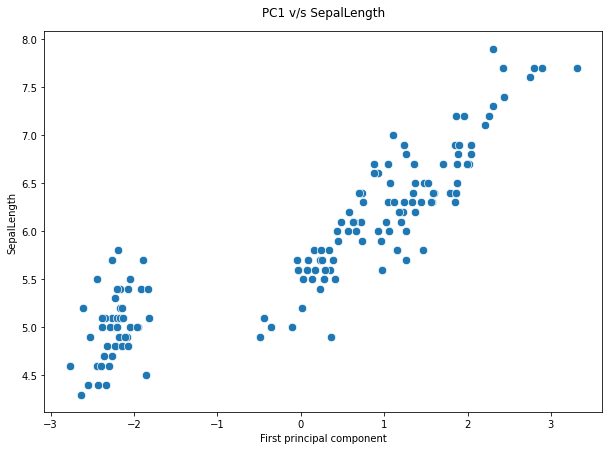

In [28]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_4_transformed[:,0], y=iris_df.SepalLength, s=70)
plt.title("PC1 v/s SepalLength",pad=15)
plt.xlabel("First principal component")
plt.ylabel("SepalLength")
plt.savefig("PC1-SepalLength.png")

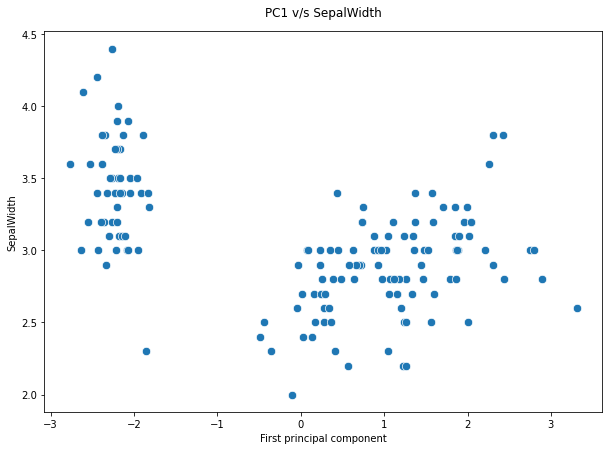

In [29]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_4_transformed[:,0], y=iris_df.SepalWidth, s=70)
plt.title("PC1 v/s SepalWidth",pad=15)
plt.xlabel("First principal component")
plt.ylabel("SepalWidth")
plt.savefig("PC1-SepalWidth.png")

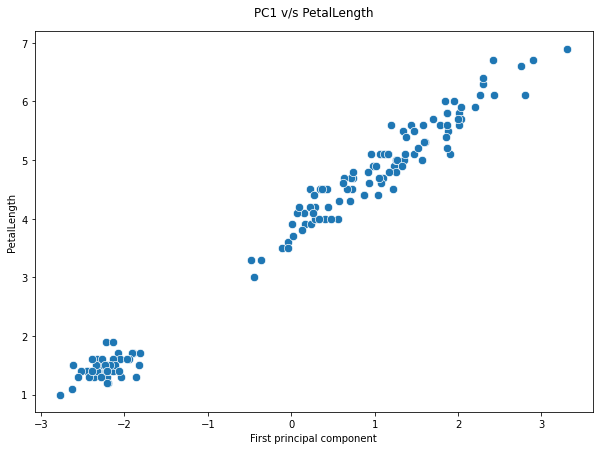

In [30]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_4_transformed[:,0], y=iris_df.PetalLength, s=70)
plt.title("PC1 v/s PetalLength",pad=15)
plt.xlabel("First principal component")
plt.ylabel("PetalLength")
plt.savefig("PC1-PetalLength.png")

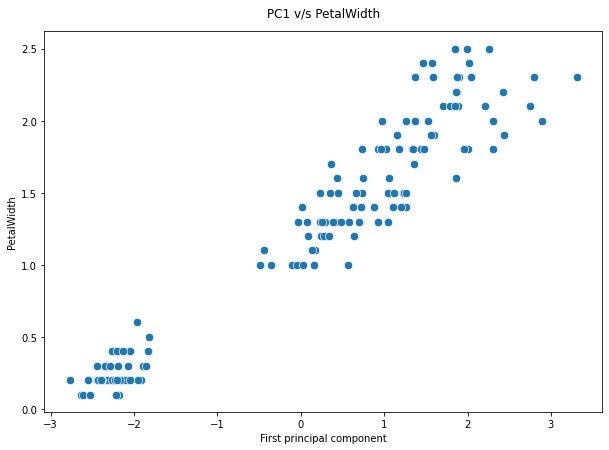

In [31]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_4_transformed[:,0], y=iris_df.PetalWidth, s=70)
plt.title("PC1 v/s PetalWidth",pad=15)
plt.xlabel("First principal component")
plt.ylabel("PetalWidth")
plt.savefig("PC1-PetalWidth.png")

In [32]:
from scipy import spatial
cosine_similarity = 1 - spatial.distance.cosine(iris_df["PetalLength"], iris_df["PetalWidth"])
cosine_similarity

0.9835496832996021

In [33]:
print(iris_df["PetalLength"].corr(iris_df["PetalWidth"]))

0.9628654314027961


In [34]:
pcadf = pd.DataFrame(pca_4_transformed, columns = ['PC1','PC2','PC3','PC4'])
pcadf

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


In [35]:
# Find correlation coefficient
print(pcadf["PC1"].corr(iris_df["SepalLength"]))
print(pcadf["PC1"].corr(iris_df["SepalWidth"]))
print(pcadf["PC1"].corr(iris_df["PetalLength"]))
print(pcadf["PC1"].corr(iris_df["PetalWidth"]))

0.8901687648612951
-0.46014270644790795
0.9915551834193606
0.9649789606692489


Conclusion: 

With the visual inspection of all the graph, I can say that the graph between principal component 1 (PC1) v/s PetalLength and principal component 1 v/s PetalWidth have more similarities or have a closer relationship. 

Petal Length and Petal Width have a closure relation with PC1. Moreover, cosine similarity between both the feature is 0.9835496832996021 (near to 1). 

Correlation between Petal Length and PC1: 0.9915551834193606
Correlation between Petal Width and PC1: 0.9649789606692489

Above mention correlation coefficient of both the features represent the closer relationship with PC1 which also portray in the visual inspection of graphs.

# Problem 5

In [36]:
# orginal feature variance
print(iris_df.SepalLength.var())
print(iris_df.SepalWidth.var())
print(iris_df.PetalLength.var())
print(iris_df.PetalWidth.var())

0.6856935123042505
0.1899794183445188
3.1162778523489942
0.5810062639821029


In [37]:
# total variance of the original features
num=[iris_df.SepalLength.var(),iris_df.SepalWidth.var(),iris_df.PetalLength.var(),iris_df.PetalWidth.var()]
sum(num)

4.572957046979867

In [38]:
# Variance of the four eigenvectors
print(pcadf.PC1.var())
print(pcadf.PC2.var())
print(pcadf.PC3.var())
print(pcadf.PC4.var())

2.9380850501999936
0.9201649041624869
0.14774182104494807
0.02085386217646228


In [39]:
# total variance of the original features
num1=[pcadf.PC1.var(),pcadf.PC2.var(),pcadf.PC3.var(),pcadf.PC4.var()]
sum(num1)

4.026845637583891

In [40]:
series = pd.Series(num1)
cumsum = series.cumsum()
cumsum

0    2.938085
1    3.858250
2    4.005992
3    4.026846
dtype: float64

In [41]:
# We should select first two components
(cumsum[1]/sum(num1))*100

95.81320720000163

Method - 2

In [42]:
# Finding principal component with n_component = 0.95
pca_95 = PCA(n_components=0.95)
pca_95.fit(scaled_data)
pca_95_transformed = pca_95.transform(scaled_data)

In [43]:
pca_95.explained_variance_ratio_*100

array([72.96244541, 22.85076179])

In [44]:
np.cumsum(pca_95.explained_variance_ratio_*100)

array([72.96244541, 95.8132072 ])

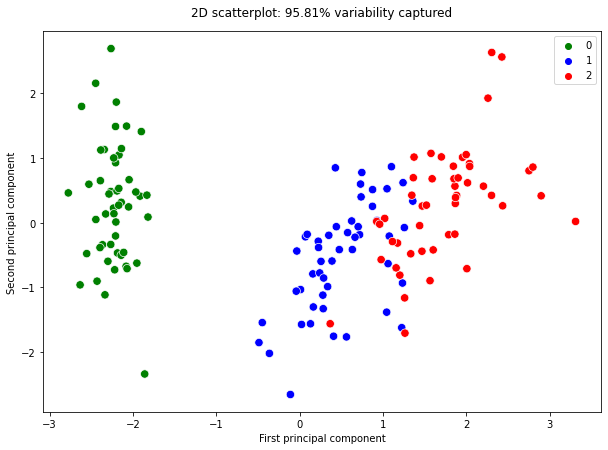

In [45]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_95_transformed[:,0], y=pca_95_transformed[:,1], s=70, hue=iris.target, palette=['green','blue','red'])
plt.title("2D scatterplot: 95.81% variability captured",pad=15)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.savefig("2D-scatterplot.png")

Conclusion: 

Total variance of the original feature is 4.572957046979867 but after applying the PCA the variance become 4.026845637583891. 

Variance of each principal components (Eigenvectors):

Variance of principal component 1 = 2.9380850501999936
Variance of principal component 2 = 0.9201649041624869
Variance of principal component 3 = 0.14774182104494807
Variance of principal component 4 = 0.02085386217646228
Total = 4.026845637583891

The Sum of first and second principal component variance is 3.858250 which is 95.81% of the total variance. In other words, first two component retain the 95.81% variance. So, we can reduce the dimensionality with 2 components.

PCA will select the number of components such that the amount of variance that needs to be explained. For example, if n_components=0.95, the algorithm will select the number of components while preserving 95% of the variability in the data.